<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Maximiliano Quintero Ortega
- Nombre de alumno 2: Tomás Apablaza Arriagada

### **Link de repositorio de GitHub:** `https://github.com/Repositivo/Repositivo.git

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [3]:
# Leer el dataset
df = pd.read_csv("fruit_vegetables.csv")
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
87841,87841,Fennel Leaf,2017-02-27,Kg,35.0,40.0,37.5
87842,87842,Mint,2017-02-27,Kg,90.0,100.0,95.0
87843,87843,Turnip A,2017-02-27,Kg,30.0,35.0,32.5
87844,87844,Tamarind,2017-02-27,Kg,100.0,110.0,105.0


In [4]:
# Crear máscara con elementos de búsqueda y seleccionar

mask = df["Commodity"].isin(["Tomato Small(Local)","Lettuce","Apple(Fuji)","Banana","Tofu"])

df_mask = df[mask]

df_mask

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
75,75,Tomato Small(Local),2013-06-17,Kg,20.0,25.0,22.5
...,...,...,...,...,...,...,...
87765,87765,Lettuce,2017-02-26,Kg,35.0,40.0,37.5
87774,87774,Tofu,2017-02-26,Kg,80.0,90.0,85.0
87776,87776,Banana,2017-02-26,Doz,70.0,80.0,75.0
87801,87801,Tomato Small(Local),2017-02-27,Kg,15.0,20.0,17.5


In [5]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
df_time_series = df_mask.groupby('Date')['Average'].sum().reset_index()
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series

,Date,Average
0,2013-06-16,219.0
1,2013-06-17,202.5
2,2013-06-18,194.0
3,2013-06-19,216.0
4,2013-06-20,204.0
...,...,...
1236,2017-02-22,215.0
1237,2017-02-23,215.0
1238,2017-02-25,215.0
1239,2017-02-26,215.0


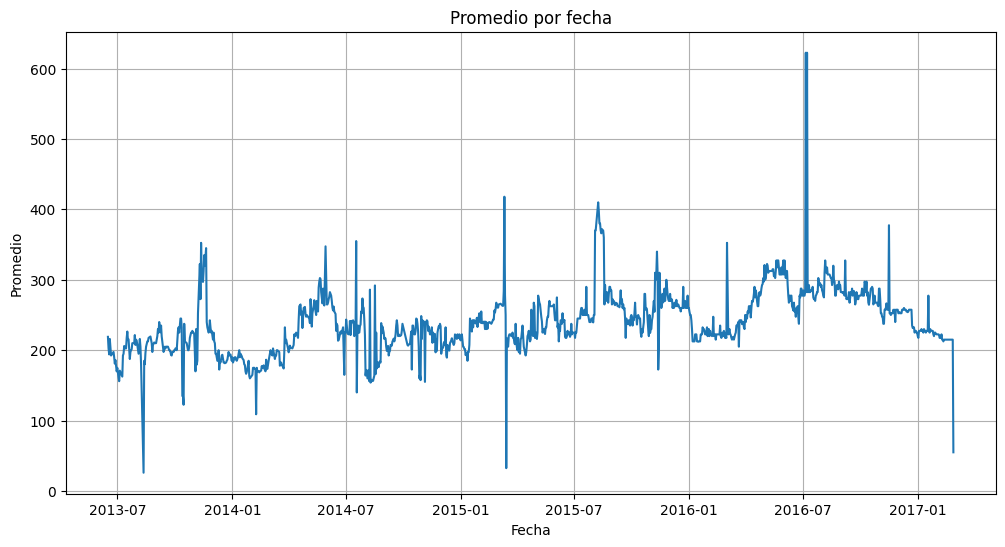

In [6]:
# Graficar serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Date'], df_time_series['Average'])
plt.xlabel('Fecha')
plt.ylabel('Promedio')
plt.title('Promedio por fecha')
plt.grid(True)
plt.show()

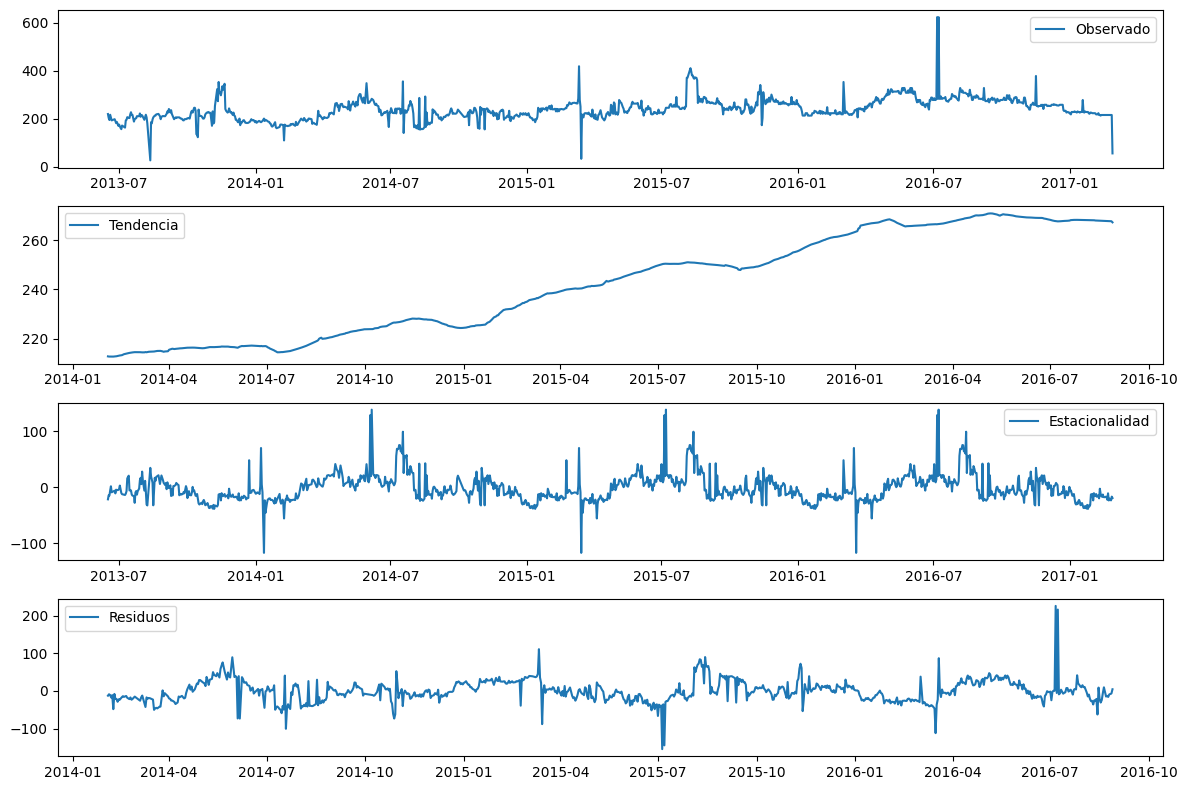

In [7]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Seteamos la columna Date como index
df_time_series_copy = df_time_series.copy()
df_time_series_copy.set_index('Date', inplace=True)
# Realizar la descomposición
df_descomposed = seasonal_decompose(df_time_series_copy['Average'], model='additive', period=365)  # Puedes ajustar el periodo si es estacional

# Graficar la descomposición
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_descomposed.observed, label='Observado')
plt.legend()

plt.subplot(412)
plt.plot(df_descomposed.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(df_descomposed.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(df_descomposed.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Realizar Hold Out de 70/30

# Determinar el índice donde se divide en 70/30
split_index = int(len(df_time_series) * 0.7)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df_time_series.iloc[:split_index].copy()
test = df_time_series.iloc[split_index:].copy()

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [9]:
#instalamos prophet
!pip install prophet

In [10]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [11]:
# Renombrar las columnas
df_time_series.rename(columns={'Date': 'ds', 'Average': 'y'}, inplace=True)

In [12]:
# Hold out

# Determinar el índice donde se divide en 70/30
split_index = int(len(df_time_series) * 0.7)

# Dividir los datos en conjuntos de entrenamiento y prueba
df_train = df_time_series.iloc[:split_index].copy()
df_test = df_time_series.iloc[split_index:].copy()
X_test = df_test.drop(columns=['y'])
y_test = df_test.drop(columns=['ds'])

df_test



,ds,y
868,2016-02-18,222.5
869,2016-02-19,222.5
870,2016-02-20,235.0
871,2016-02-21,220.0
872,2016-02-22,217.5
...,...,...
1236,2017-02-22,215.0
1237,2017-02-23,215.0
1238,2017-02-25,215.0
1239,2017-02-26,215.0


**2. Modelo y entrenamiento**

In [13]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/63sbx3v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/lcjojdm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26166', 'data', 'file=/tmp/tmp6ojg3q7x/63sbx3v2.json', 'init=/tmp/tmp6ojg3q7x/lcjojdm_.json', 'output', 'file=/tmp/tmp6ojg3q7x/prophet_modelctnhd8wr/prophet_model-20240526235831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [14]:
# Respuesta
forecast = model.predict(X_test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-18,262.779503,206.237206,283.506553,262.779503,262.779503,-18.197115,-18.197115,-18.197115,2.359081,2.359081,2.359081,-20.556195,-20.556195,-20.556195,0.0,0.0,0.0,244.582389
1,2016-02-19,262.838925,203.990568,285.869269,262.838925,262.838925,-16.527129,-16.527129,-16.527129,2.822612,2.822612,2.822612,-19.349741,-19.349741,-19.349741,0.0,0.0,0.0,246.311796
2,2016-02-20,262.898348,200.553661,280.676213,262.898348,262.898348,-21.528981,-21.528981,-21.528981,-3.556118,-3.556118,-3.556118,-17.972862,-17.972862,-17.972862,0.0,0.0,0.0,241.369367
3,2016-02-21,262.957770,203.352843,286.956624,262.957770,262.957770,-17.268932,-17.268932,-17.268932,-0.827981,-0.827981,-0.827981,-16.440951,-16.440951,-16.440951,0.0,0.0,0.0,245.688838
4,2016-02-22,263.017192,203.913267,287.691033,263.017192,263.017192,-16.625875,-16.625875,-16.625875,-1.851398,-1.851398,-1.851398,-14.774476,-14.774476,-14.774476,0.0,0.0,0.0,246.391317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2017-02-22,284.765675,231.004290,309.999538,280.400245,288.860663,-13.271836,-13.271836,-13.271836,0.179460,0.179460,0.179460,-13.451296,-13.451296,-13.451296,0.0,0.0,0.0,271.493839
369,2017-02-23,284.825097,236.258301,312.596062,280.444588,288.934224,-9.253382,-9.253382,-9.253382,2.359081,2.359081,2.359081,-11.612462,-11.612462,-11.612462,0.0,0.0,0.0,275.571716
370,2017-02-25,284.943941,233.447067,317.087762,280.548353,289.070249,-11.359182,-11.359182,-11.359182,-3.556118,-3.556118,-3.556118,-7.803064,-7.803064,-7.803064,0.0,0.0,0.0,273.584759
371,2017-02-26,285.003363,236.569587,319.574536,280.590878,289.157150,-6.732891,-6.732891,-6.732891,-0.827981,-0.827981,-0.827981,-5.904910,-5.904910,-5.904910,0.0,0.0,0.0,278.270472


El dataframe resultante presenta diferentes atributos relacionados a la descomposición de la serie temporal, presentando columnas relacionadas a la tendencia, la periodicidad y el residuo.

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

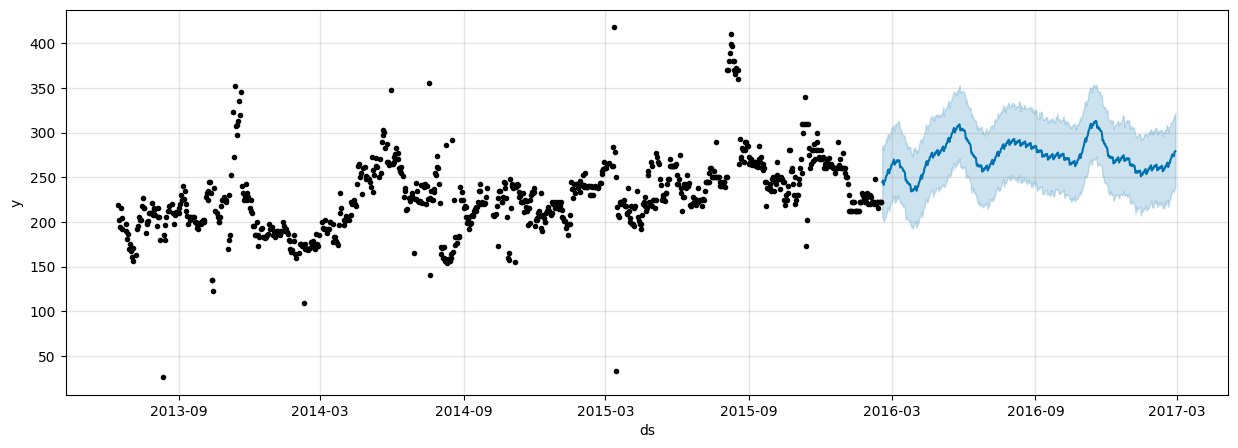

In [15]:
# plot forecast, estático.
f, ax = plt.subplots(1, 1, figsize=(15, 5))
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

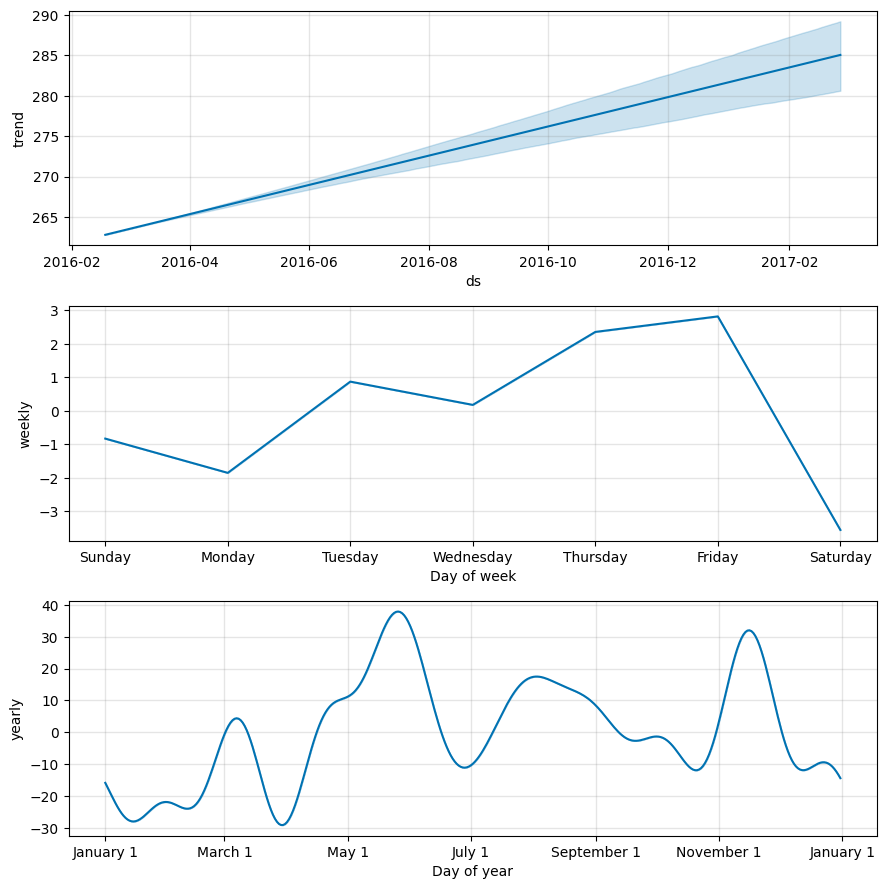

In [16]:
# descomposición por componentes, estático
fig = model.plot_components(forecast)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [17]:
# Respuesta
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

percentages = [0.15,0.5,1]

for percentage in percentages:
  # Calcula el índice del X% de los datos
  n = len(forecast)
  n_x_percent = int(percentage * n)

  # Toma las primeras filas hasta el índice del X%
  y_pred_x_percent = forecast.iloc[:n_x_percent]
  y_pred_x_percent = y_pred_x_percent["yhat"]

  # Toma las primeras filas hasta el índice del X%
  y_test_x_percent = y_test.iloc[:n_x_percent]

  # Calcular RMSE
  rmse = np.sqrt(mean_squared_error(y_test_x_percent, y_pred_x_percent))

  # Calcular MAE
  mae = mean_absolute_error(y_test_x_percent, y_pred_x_percent)

  # Calcular MAPE
  epsilon = 1e-10  # Pequeña cantidad para evitar división por cero
  mape = np.mean(np.abs((y_test_x_percent - y_pred_x_percent) / y_test_x_percent)) * 100

  print(f"Resultandos para {percentage*100}% de los datos:")
  print(f'RMSE Test: {rmse:.2f}')
  print(f'MAE Test: {mae:.2f}')
  print(f'MAPE Test: {mape:.2f}')



Resultandos para 15.0% de los datos:
RMSE Test: 29.78
MAE Test: 23.35
MAPE Test: nan
Resultandos para 50.0% de los datos:
RMSE Test: 42.70
MAE Test: 20.73
MAPE Test: nan
Resultandos para 100% de los datos:
RMSE Test: 39.39
MAE Test: 23.87
MAPE Test: nan


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [18]:
# Respuesta
# Crear DataFrame con fechas importantes
festivities = pd.DataFrame({
    'holiday': 'festivies',
    'ds': pd.to_datetime(['2013-01-01', '2013-05-01', '2013-09-18', '2013-12-24', '2013-12-25',
                          '2014-01-01', '2014-05-01', '2014-09-18', '2014-12-24', '2014-12-25',
                          '2015-01-01', '2015-05-01', '2015-09-18', '2015-12-24', '2015-12-25',
                          '2016-01-01', '2016-05-01', '2016-09-18', '2016-12-24', '2016-12-25',
                          '2017-01-01', '2017-05-01', '2017-09-18', '2017-12-24', '2017-12-25',
                          '2018-01-01', '2018-05-01', '2018-09-18', '2018-12-24', '2018-12-25',
                          '2019-01-01', '2019-05-01', '2019-09-18', '2019-12-24', '2019-12-25',
                          '2020-01-01', '2020-05-01', '2020-09-18', '2020-12-24', '2020-12-25',
                          '2021-01-01', '2021-05-01', '2021-09-18', '2021-12-24', '2021-12-25'])
})
festivities

,holiday,ds
0,festivies,2013-01-01
1,festivies,2013-05-01
2,festivies,2013-09-18
3,festivies,2013-12-24
4,festivies,2013-12-25
5,festivies,2014-01-01
6,festivies,2014-05-01
7,festivies,2014-09-18
8,festivies,2014-12-24
9,festivies,2014-12-25


**2. Predecir**

In [19]:
# Respuesta
# Crear y ajustar el modelo Prophet con festividades
model_with_festivities = Prophet(holidays=festivities)
model_with_festivities.fit(df_train)

# Predecir
forecast_with_festivities = model_with_festivities.predict(X_test)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/jru5szh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/410f8j5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48521', 'data', 'file=/tmp/tmp6ojg3q7x/jru5szh2.json', 'init=/tmp/tmp6ojg3q7x/410f8j5b.json', 'output', 'file=/tmp/tmp6ojg3q7x/prophet_model25lw1djk/prophet_model-20240526235834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Resultados**

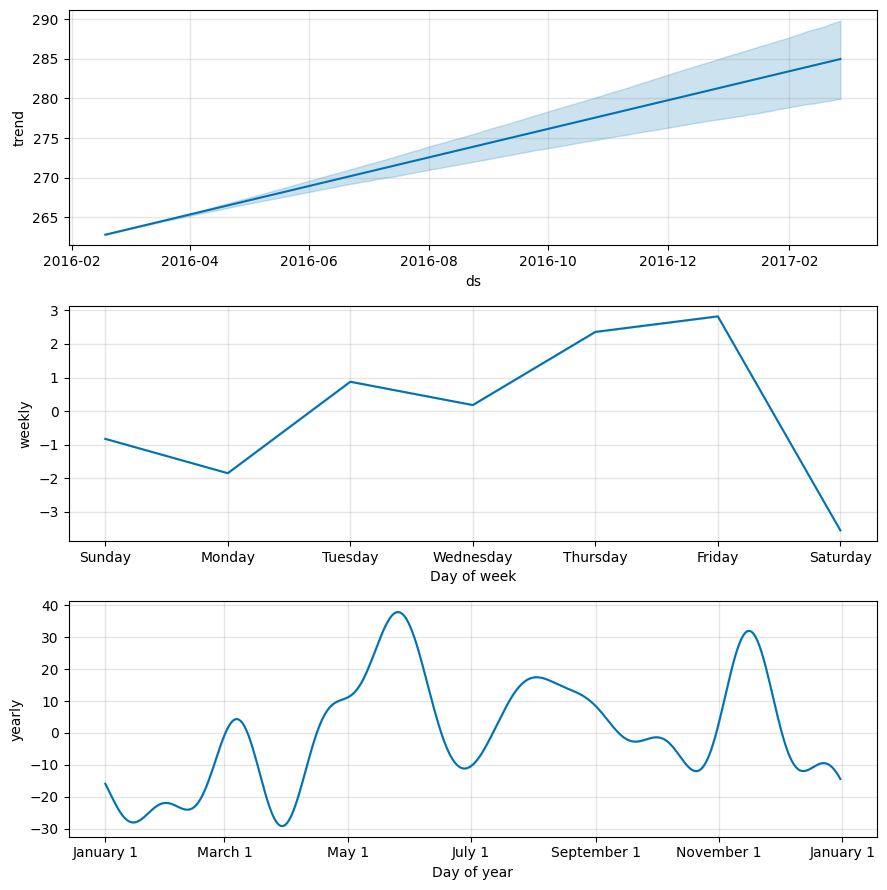

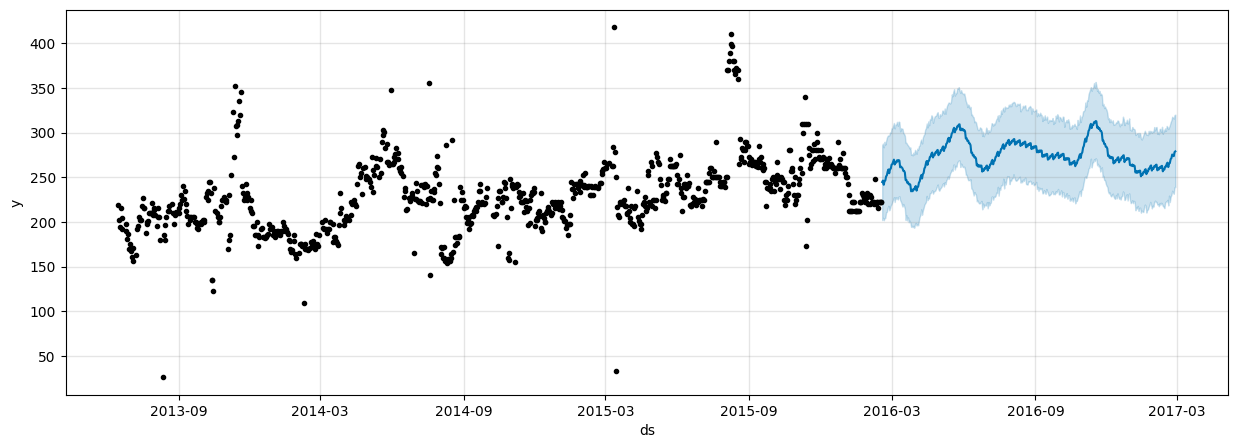

  Metric  Without Festivities  With Festivities
0   RMSE            39.387273         39.370206
1    MAE            23.873088         23.858204
2   MAPE                  NaN               NaN


In [20]:
# Respuesta

#plot de componentes
fig = model.plot_components(forecast_with_festivities)


#plot de predicción
f, ax = plt.subplots(1, 1, figsize=(15, 5))
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast_with_festivities, ax=ax)
plt.show()

#resultados
rmse_with_festivities = np.sqrt(mean_squared_error(df_test['y'], forecast_with_festivities['yhat']))
mae_with_festivities = mean_absolute_error(df_test['y'], forecast_with_festivities['yhat'])
mape_with_festivities = np.mean(np.abs((df_test['y'] - forecast_with_festivities['yhat']) / df_test['y'])) * 100
# Crear tabla de resultados
results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE'],
    'Without Festivities': [rmse, mae, mape],
    'With Festivities': [rmse_with_festivities, mae_with_festivities, mape_with_festivities]
})

print(results)

¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

En este caso, las predicciones no fueron más precisas al agregar festividades, se matuvieron bastante similares. Esto se puede deber a que no hay un gran impacto de las festividades o, la elección de estas no fue la mejor.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/ljadomof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ojg3q7x/j8ax4rae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41197', 'data', 'file=/tmp/tmp6ojg3q7x/ljadomof.json', 'init=/tmp/tmp6ojg3q7x/j8ax4rae.json', 'output', 'file=/tmp/tmp6ojg3q7x/prophet_modelr5avh33l/prophet_model-20240526235836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


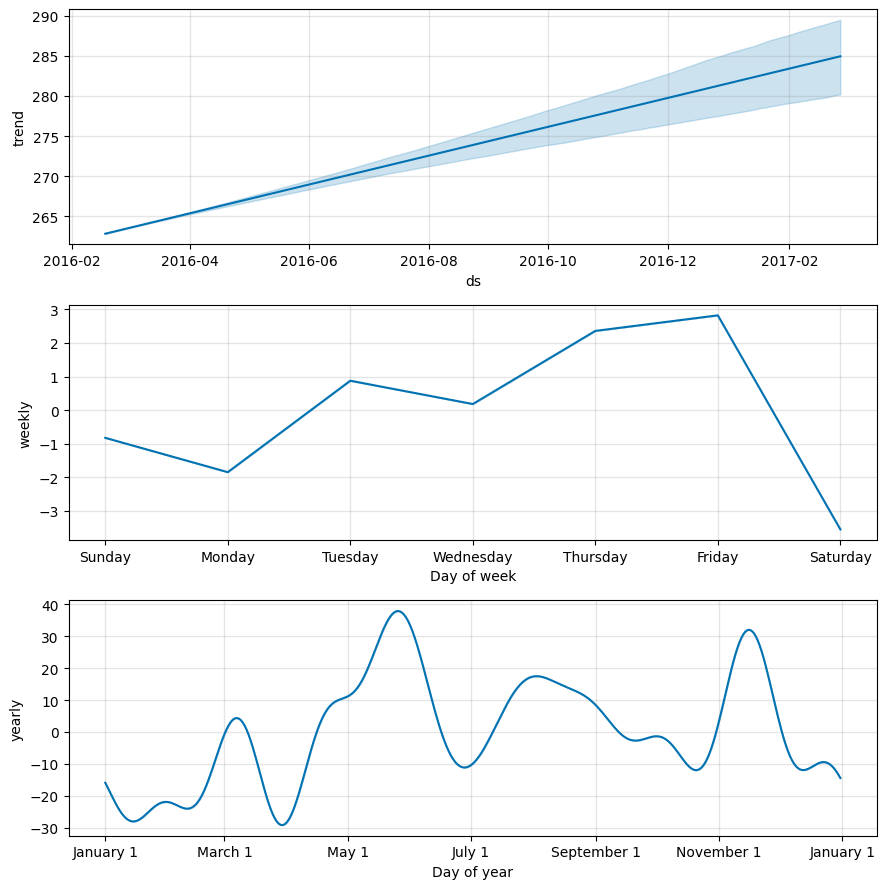

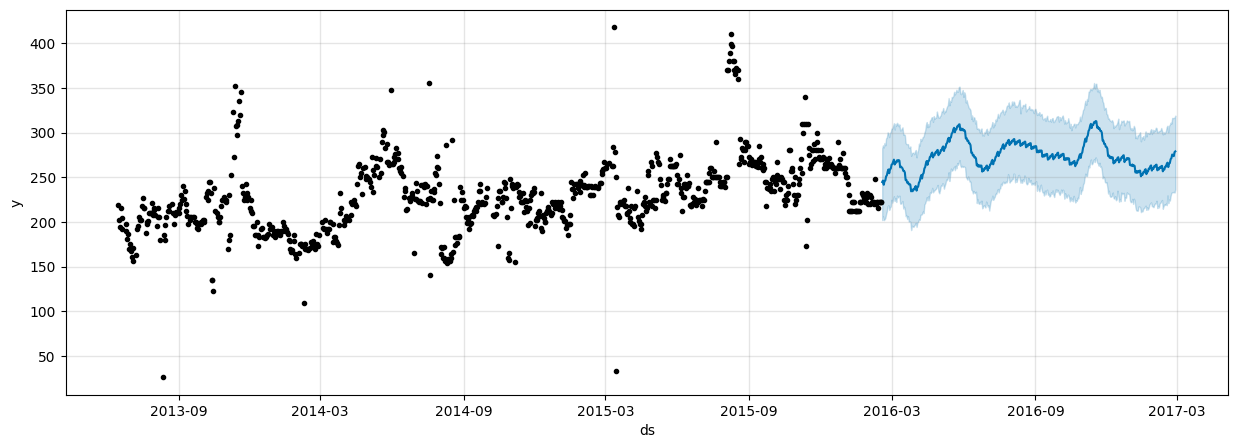

  Metric  Without Festivities  With Festivities  With Regressor
0   RMSE            39.387273         39.370206       39.370206
1    MAE            23.873088         23.858204       23.858204
2   MAPE                  NaN               NaN             NaN


In [21]:
# Respuesta

# Definir función para generar el regresor de invierno
def is_winter(date):
    return 1 if (date.month == 6 and date.day >= 21) or (date.month in [7, 8]) or (date.month == 9 and date.day <= 21) else 0

# Aplicar función al DataFrame original y al de testeo
df_train['is_winter'] = df_train['ds'].apply(is_winter)
df_test['is_winter'] = df_test['ds'].apply(is_winter)
X_test = df_test.drop(columns=['y'])

# Crear y ajustar el modelo Prophet con nuevo regresor
model_with_regressor = Prophet(holidays=festivities)
model_with_regressor.fit(df_train)

# Predecir
forecast_with_regressor = model_with_regressor.predict(X_test)

#plot de componentes
fig = model.plot_components(forecast_with_regressor)

#plot de predicción
f, ax = plt.subplots(1, 1, figsize=(15, 5))
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast_with_regressor, ax=ax)
plt.show()

#resultados
rmse_with_regressor = np.sqrt(mean_squared_error(y_test, forecast_with_regressor['yhat']))
mae_with_regressor = mean_absolute_error(y_test, forecast_with_regressor['yhat'])
mape_with_regressor = np.mean(np.abs((y_test - forecast_with_regressor['yhat']) / y_test)) * 100
# Crear tabla de resultados
results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE'],
    'Without Festivities': [rmse, mae, mape],
    'With Festivities': [rmse_with_festivities, mae_with_festivities, mape_with_festivities],
    'With Regressor': [rmse_with_regressor, mae_with_regressor, mape_with_regressor]
})

print(results)



# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [22]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357240 sha256=573ab53b96c4c57b802ff6c755bae424b660fb7b4e837688ed12479c6281d906
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [23]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [24]:
df = pd.read_parquet('ratings_Electronics.parquet')
df

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0
...,...,...,...
7824209,5919,6726,5.0
7824211,2528,6726,5.0
7824212,4114,6726,5.0
7824216,4888,6726,5.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [25]:
print("La cantidad de usuarios únicos son:",df["user_id"].nunique(), ", y la cantidad de productos únicos son:" ,df["prod_id"].nunique())

La cantidad de usuarios únicos son: 8014 , y la cantidad de productos únicos son: 6727


Verificar que no hayan valores nulos

In [26]:
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

Graficar distribución de los ratings

<Axes: >

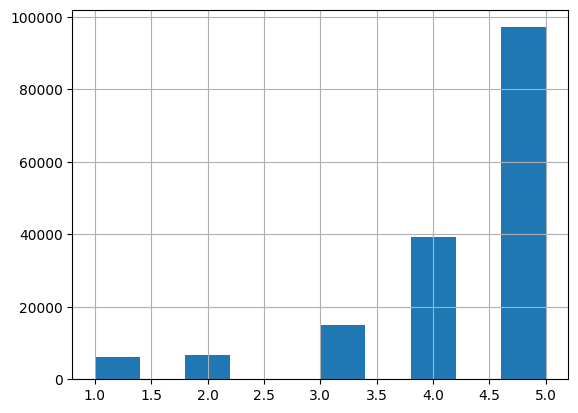

In [27]:
df["rating"].hist()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [28]:
df.groupby("user_id")["rating"].count().sort_values(ascending=False).head(5)

user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: rating, dtype: int64

In [29]:
df.groupby("prod_id")["rating"].count().sort_values(ascending=False).head(5)

prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: rating, dtype: int64

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. Los usuarios tienden en su mayoria a estar conformes con el producto, pues la mayoria de los ratings se concentran como mayores que 3. Por lo mismo, son raras las veces en que un usuario se muestra disconforme con el producto

2. No existen nulos, es decir, cada usuario al menos rankeo un producto y por lo mismo, cada item, esta rankeado al menos una vez.

3. Los 5 primeros productos representan alrededor del 1,5% del registro total de los ratings, lo que es considerable, considerando los 164k registros.


## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [31]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise

# Generar el Dataset de Surprise
dataset = Dataset.load_from_df(df_collaborative, reader)

# Dividir los datos en train y test con 30% de los datos para el conjunto de test y semilla 42
trainset, testset = train_test_split(dataset, test_size=0.3, random_state=42)

# Mostrar los conjuntos resultantes
trainset, testset


(<surprise.trainset.Trainset at 0x799b7a7064a0>,
 [(2170, 4363, 5.0),
  (6665, 5810, 4.0),
  (3315, 5232, 4.0),
  (2051, 2892, 5.0),
  (6170, 2929, 5.0),
  (132, 401, 4.0),
  (5449, 1774, 5.0),
  (5954, 6010, 5.0),
  (1607, 4630, 5.0),
  (6546, 5245, 5.0),
  (85, 2469, 4.0),
  (2481, 6064, 3.0),
  (3893, 2442, 5.0),
  (4799, 2779, 5.0),
  (4133, 3981, 5.0),
  (841, 4734, 2.0),
  (3633, 2469, 3.0),
  (364, 3931, 5.0),
  (5195, 4386, 5.0),
  (6054, 1024, 5.0),
  (5287, 6122, 4.0),
  (781, 6013, 5.0),
  (7471, 6290, 2.0),
  (290, 3473, 5.0),
  (6440, 4319, 5.0),
  (4517, 6302, 5.0),
  (147, 1622, 5.0),
  (5799, 2664, 3.0),
  (7069, 4251, 5.0),
  (3299, 2617, 5.0),
  (4114, 5244, 4.0),
  (3908, 3608, 4.0),
  (2001, 312, 5.0),
  (2855, 31, 2.0),
  (7941, 885, 2.0),
  (5120, 1449, 4.0),
  (2567, 3282, 5.0),
  (5508, 800, 5.0),
  (2712, 1814, 5.0),
  (1824, 5199, 5.0),
  (7495, 4217, 3.0),
  (6640, 5180, 4.0),
  (7900, 2961, 4.0),
  (5942, 5198, 3.0),
  (4459, 886, 2.0),
  (3437, 5977, 5.0),


## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [32]:
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise import NormalPredictor, accuracy

# Entrenar el modelo NormalPredictor con los datos de entrenamiento
model = NormalPredictor()
model.fit(trainset)

# Generar predicciones usando el modelo entrenado
predictions = model.test(testset)



# Respuesta

In [33]:
# Evaluar con MAE

# Evaluar las predicciones usando RMSE y MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)



RMSE: 1.3287
MAE:  0.9863


El MAE indica que las predicciones de rating estan en promedio alrededor del 1.3 puntos de la calificación real. Lo que en una escala del 0 a 5 no es un buen rendimiento.

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [59]:
def get_user_top_k(predictions, user, k = 10):

  user_predictions = [pred for pred in predictions if pred.uid == user]
  user_predictions.sort(key=lambda x: x.est, reverse=True)
  return user_predictions[:k]

In [65]:
from surprise.accuracy import mse



sim_options = {'name': 'cosine',
               'user_based': True}

user_model = KNNBasic(sim_options=sim_options)


user_model.fit(trainset)
user_predictions = user_model.test(testset)
user_mae = accuracy.mae(user_predictions)

user_predictions


Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7646


[Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid=6665, iid=5810, r_ui=4.0, est=4.9, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid=3315, iid=5232, r_ui=4.0, est=3.114794931067116, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid=2051, iid=2892, r_ui=5.0, est=4.308761018779833, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid=6170, iid=2929, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=132, iid=401, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=5449, iid=1774, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=5954, iid=6010, r_ui=5.0, est=4.591475202939999, details={'actual_k': 27, 'was_impossible': False}),
 Prediction(uid=1607, iid=4630, r_ui=5.0, est=4.308761018779833, details={'was_impossible': True, 'reason': 'Not e

In [67]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(user_predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.799755049750801, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.399861310283875, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False})]

In [66]:

sim_options = {'name': 'cosine',
               'user_based': False}



item_model = KNNBasic(sim_options=sim_options)
item_model.fit(trainset)
item_predictions = item_model.test(testset)

item_mae = accuracy.mae(item_predictions)

item_predictions



Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7535


[Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.729649292784748, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid=6665, iid=5810, r_ui=4.0, est=3.4440666404521356, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid=3315, iid=5232, r_ui=4.0, est=4.15770452651877, details={'actual_k': 13, 'was_impossible': False}),
 Prediction(uid=2051, iid=2892, r_ui=5.0, est=4.308761018779833, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid=6170, iid=2929, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=132, iid=401, r_ui=4.0, est=4.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=5449, iid=1774, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=5954, iid=6010, r_ui=5.0, est=4.338264295361933, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1607, iid=4630, r_ui=5.0, est=4.308761018779833, details={'was_impossible': True, 

In [68]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(item_predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.857142857142857, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.856937449847549, details={'actual_k': 7, 'was_impossible': False})]

## Comente :

1) El enfoque con mejor rendimiento es basado en el producto, su MAE de 0.753, indiqua que la predicciones estan en esa cantidad promedio alejadas de la calificación real y por lo mismo se alcanza una mejor calificación que el modelo Baseline.

2) Son diferentes los resultados por el enfoque del algoritmo, dado que, para el de tipo usuario toma como referencia otros usarios para predecir el rating, en cambio en el del item, toma como referencia otros items, por eso, el resultado variará.

3) En su mayoria en el grupo de 5 productos con mejores calificaciones, 4 elementos estan considerados por ambos enfoques, por lo que podemos concluir, que la forman en la que predicen no es tan diferente. Aunque, enfoque de items es un poco más optimista que el de usuarios.



## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [57]:

# Respuesta


svd_model = SVD()
svd_model.fit(trainset)


svd_predictions = svd_model.test(testset)



svd_predictions

[Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.493345641353519, details={'was_impossible': False}),
 Prediction(uid=6665, iid=5810, r_ui=4.0, est=4.127477304224711, details={'was_impossible': False}),
 Prediction(uid=3315, iid=5232, r_ui=4.0, est=3.590241713894472, details={'was_impossible': False}),
 Prediction(uid=2051, iid=2892, r_ui=5.0, est=4.450934632432913, details={'was_impossible': False}),
 Prediction(uid=6170, iid=2929, r_ui=5.0, est=4.630316838404636, details={'was_impossible': False}),
 Prediction(uid=132, iid=401, r_ui=4.0, est=3.7944707706248293, details={'was_impossible': False}),
 Prediction(uid=5449, iid=1774, r_ui=5.0, est=4.391110290972807, details={'was_impossible': False}),
 Prediction(uid=5954, iid=6010, r_ui=5.0, est=4.781047039010911, details={'was_impossible': False}),
 Prediction(uid=1607, iid=4630, r_ui=5.0, est=3.425878797798238, details={'was_impossible': False}),
 Prediction(uid=6546, iid=5245, r_ui=5.0, est=4.391177760414486, details={'was_impossible': 

In [69]:
# calcular mae
from surprise.accuracy import mae
mae(svd_predictions)

# Obtener predicción para usuario 3 y producto 3906
example = [(3, 3906, None)]
svd_rating_prediction = svd_model.test(example)[0].est
print(f'Predicted rating for user 3 on item 3906 (SVD): {svd_rating_prediction}')



svd_top_5 = get_user_top_k(svd_predictions, user=2170, k=5)

print('Top 5 recommendations for user 2170 (SVD):')
for pred in svd_top_5:
    print(f'Product: {pred.iid}, Predicted rating: {pred.est}')

MAE:  0.6952
Predicted rating for user 3 on item 3906 (SVD): 2.4670792765967047
Top 5 recommendations for user 2170 (SVD):
Product: 1326, Predicted rating: 4.894596979876956
Product: 1692, Predicted rating: 4.850309774733544
Product: 3595, Predicted rating: 4.746276170745479
Product: 4650, Predicted rating: 4.669828337622959
Product: 5990, Predicted rating: 4.65205498939399


1) Los modelos basados en memoria, como KNN, utilizan similitudes entre usuarios o ítems para realizar recomendaciones. Por otro lado, SVD (Singular Value Decomposition) es un modelo de factorización matricial que descompone la matriz de calificaciones en matrices de usuarios y ítems latentes, buscando aprender características latentes subyacentes a los datos. Esto permite capturar patrones complejos y ocultos en los datos de manera más efectiva que los modelos basados en memoria.

2) Indica las caracteristicas latentes, a mayor num, mayor capacidad de capturar complejidad, pero podría aumentar el sobreajuste

3) μ: Es la calificación media global en el conjunto de datos.
bu: Es el sesgo del usuario
bi: Es el sesgo del ítem. Su manipualción puede aumentar el sobreajuste

4) Su rendimeinto fue muy superior, comparando el Mae de 0.68 con, es decir o.68 puntos de predicción con respecto a la calificación real, mejor aún que todos los anteriores

5)

6)Se ven un poco más precisos, no con valores enteros como los anteriores modelos. Quizas debido a la factorización matricial

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?

El de svd  
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.